In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pandas import Series

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
taxtrain_data =  pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv" )
taxtest_data =  pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')

In [5]:
taxtrain_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


In [6]:
taxtrain_data['PoliticalParty'].value_counts()

Democrat       269
Independent    269
Republican     265
Name: PoliticalParty, dtype: int64

In [7]:
taxtrain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


In [8]:
taxtrain_data.describe()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,502.241594,155402.688667,-15351.252802,0.971357,2.607721,60.559153,2.435866,0.506849,0.509340,0.516812
std,288.460068,86788.153213,595184.302049,0.803935,1.675492,25.071219,1.703542,0.500265,0.500224,0.500029
min,1.000000,185.000000,-999994.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,254.500000,82373.000000,-516765.000000,0.000000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000
50%,501.000000,156542.000000,-24440.000000,1.000000,3.000000,60.000000,2.000000,1.000000,1.000000,1.000000
75%,754.500000,230772.000000,518135.500000,2.000000,4.000000,82.000000,4.000000,1.000000,1.000000,1.000000
max,1004.000000,299374.000000,999628.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


In [9]:
taxtest_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,17,253274,-633752,2,1,94,3,0,1,1
1,590,47107,322850,0,1,30,2,1,1,0
2,224,111874,300583,0,2,46,3,0,1,1
3,960,96670,107419,0,3,77,5,0,0,0
4,57,128669,341273,0,0,92,4,1,1,1


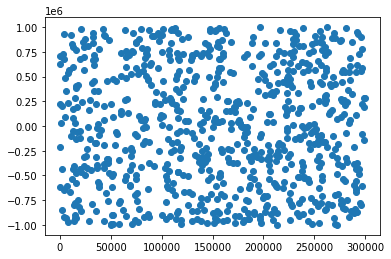

In [10]:
plt.scatter(taxtrain_data['HHI'], taxtrain_data['HHDL'])
plt.show()

In [11]:
import seaborn as sns

<AxesSubplot:>

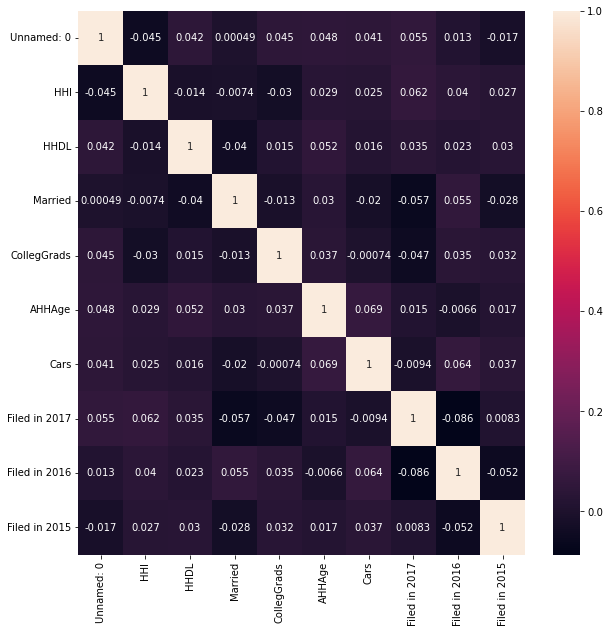

In [12]:
plt.figure(figsize = (10, 10))
sns.heatmap(taxtrain_data.corr(), annot = True)

In [13]:
taxtrain_data= taxtrain_data.drop(['Unnamed: 0'], axis= 1)

taxtrain_data.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,183414,-12402,1,2,28,1,0,0,1,Democrat
1,129786,700251,2,5,63,3,0,0,0,Republican
2,268343,493411,2,4,44,1,1,0,1,Independent
3,290506,-433408,1,1,28,5,1,0,1,Republican
4,90108,907135,1,3,57,5,1,1,0,Democrat


In [15]:
trainx_data = taxtrain_data.drop('PoliticalParty', axis= 1)
y_train= taxtrain_data.PoliticalParty

In [16]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train= std_scale.fit_transform(trainx_data)

In [17]:
X_train=pd.DataFrame(data=X_train,columns=trainx_data.columns[:])

In [18]:
X_train.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,0.322956,0.004958,0.035650,-0.362938,-1.299476,-0.843396,-1.013794,-1.018858,0.966923
1,-0.295347,1.203070,1.280308,1.428697,0.097417,0.331360,-1.013794,-1.018858,-1.034209
2,1.302144,0.855331,1.280308,0.831485,-0.660896,-0.843396,0.986394,-1.018858,0.966923
3,1.557672,-0.702837,0.035650,-0.960150,-1.299476,1.506117,0.986394,-1.018858,0.966923
4,-0.752815,1.550883,0.035650,0.234274,-0.142050,1.506117,0.986394,0.981491,-1.034209


In [19]:
taxtest_data.describe()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,503.532338,146021.20398,28027.970149,0.965174,2.547264,60.651741,2.492537,0.512438,0.527363,0.482587
std,296.674907,83432.62547,588184.526824,0.820842,1.737528,23.996210,1.697408,0.501093,0.500497,0.500944
min,4.000000,1418.00000,-993611.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,249.000000,85083.00000,-488672.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000,0.000000
50%,510.000000,137468.00000,73466.000000,1.000000,2.000000,61.000000,3.000000,1.000000,1.000000,0.000000
75%,748.000000,220331.00000,529624.000000,2.000000,4.000000,79.000000,4.000000,1.000000,1.000000,1.000000
max,990.000000,299700.00000,985448.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


In [20]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_test= std_scale.fit_transform(taxtest_data)

In [21]:
X_test=pd.DataFrame(data=X_test,columns=taxtest_data.columns[:])
X_test.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,-1.644046,1.288712,-1.127932,1.263837,-0.892720,1.393200,0.299710,-1.025193,0.946692,1.035454
1,0.292184,-1.188518,0.502492,-1.178771,-0.892720,-1.280547,-0.290895,0.975426,0.946692,-0.965760
2,-0.944570,-0.410301,0.464541,-1.178771,-0.315753,-0.612110,0.299710,-1.025193,0.946692,1.035454
3,1.542454,-0.592987,0.135313,-1.178771,0.261214,0.682986,1.480919,-1.025193,-1.056309,-0.965760
4,-1.508881,-0.208498,0.533892,-1.178771,-1.469688,1.309646,0.890314,0.975426,0.946692,1.035454


In [22]:
X_test= X_test.drop('Unnamed: 0', axis= 1)

X_test.columns

Index(['HHI', 'HHDL', 'Married', 'CollegGrads', 'AHHAge', 'Cars',
       'Filed in 2017', 'Filed in 2016', 'Filed in 2015'],
      dtype='object')

In [23]:
X = trainx_data
y = y_train

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state= 42)

In [24]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

logmodel_predictions = logmodel.predict(X_val)

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_val, logmodel_predictions))

              precision    recall  f1-score   support

    Democrat       0.00      0.00      0.00        53
 Independent       0.35      0.48      0.41        58
  Republican       0.32      0.52      0.39        50

    accuracy                           0.34       161
   macro avg       0.22      0.33      0.27       161
weighted avg       0.23      0.34      0.27       161



C:\Users\Adrija\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Adrija\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Adrija\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=7, random_state=42)
clf.fit(X_train,y_train)

clf_predictions = clf.predict(X_val)

In [27]:
print(classification_report(y_val, clf_predictions))

              precision    recall  f1-score   support

    Democrat       0.50      0.26      0.35        53
 Independent       0.42      0.45      0.43        58
  Republican       0.32      0.46      0.38        50

    accuracy                           0.39       161
   macro avg       0.41      0.39      0.39       161
weighted avg       0.42      0.39      0.39       161



In [28]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
one= OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)

one_predictions = one.predict(X_val)

C:\Users\Adrija\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Adrija\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Adrija\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [30]:
print(classification_report(y_val, one_predictions))

              precision    recall  f1-score   support

    Democrat       0.32      0.47      0.38        53
 Independent       0.35      0.47      0.40        58
  Republican       0.29      0.04      0.07        50

    accuracy                           0.34       161
   macro avg       0.32      0.33      0.28       161
weighted avg       0.32      0.34      0.29       161



In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rdf = RandomForestClassifier(n_estimators= 100)
rdf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
rdf_predictions = rdf.predict(X_val)
print(classification_report(y_val, rdf_predictions))

              precision    recall  f1-score   support

    Democrat       0.38      0.40      0.39        53
 Independent       0.48      0.40      0.43        58
  Republican       0.31      0.36      0.33        50

    accuracy                           0.39       161
   macro avg       0.39      0.38      0.39       161
weighted avg       0.39      0.39      0.39       161



In [33]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=7, random_state=42)
clf.fit(X_train,y_train)

clf_predictions = clf.predict(X_test)

rdf = RandomForestClassifier(n_estimators= 100)
rdf.fit(X_train, y_train)

rdf_predictions = rdf.predict(X_test)

one= OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)

one_predictions = one.predict(X_test)

C:\Users\Adrija\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Adrija\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Adrija\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [34]:
output = pd.DataFrame({'Prediction': one_predictions})
output.to_csv(r'C:\Users\Adrija\Documents\Python\politicalparty.csv', index=False)